# Pandas overview

`pandas` is a Python library for data analysis.

It offers a number of data exploration, cleaning  and transformation operations that are critical in working with data in Python.

`pandas` build upon `numpy` and `scipy` providing easy-to-use data structures and data manipulation functions with integrated indexing.

Just as NumPy provides the basic array data type plus core array operations, `pandas`
1. defines fundamental structures for working with data
2. endows them with methods that facilitate operations such as
    * reading the data
    * adjusting indices
    * working with dates and time series
    * sorting, grouping, re-ordering and general data cleaning
    * dealing with missing values
    * etc., etc.

More sophisticated statistical functionality is left to other packages, such as `statsmodels` and `scikit-learn`, which are built on top of `pandas`.

# Install pandas

In [1]:
%%capture
# capture is used to suppress output of package installation :)
%pip install pandas

## Import conventions

In [1]:
import pandas as pd

# Pandas data types

Pandas deals mostly with:
- **Series**: 1D homogeneous array, e.g., a "column" of data, such as a collection of observations on a single variable.
- **DataFrame**: 2D labeled heterogeneous array, e.g., a two-dimensional object for storing related columns of data.
- **Panel**: general 3D array

## Pandas Series

Pandas *Series* is one-dimentional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc.).

The axis labels are often referred to as *index*.

Example of creating Pandas series :

In [3]:
s1 = pd.Series( [-3,-1,1,3,5] )
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from `0` to `len(data)-1`

In [4]:
# View index values
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


Creating Pandas series with index:

In [5]:
import numpy as np
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s2)

a   -1.606310
b   -2.050669
c    1.134003
d    0.555760
e   -2.254536
dtype: float64


In [6]:
# View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [7]:
# Create a Series from dictionary
data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'pi': 3.1415, 'e': 2.71828}
pi    3.14150
e     2.71828
dtype: float64


In [8]:
# reordering the elements
s4 = pd.Series ( data, index = ['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14150
tau        NaN
dtype: float64


`NAN` (not a number) - is used to specify a missing value in Pandas.

### Slicing
First 2 elements:

In [9]:
s1[:2]

0   -3
1   -1
dtype: int64

Elements out of order:

In [10]:
print( s1[ [2,1,0] ])

2    1
1   -1
0   -3
dtype: int64


In [11]:
type(s1)

pandas.core.series.Series

### Remember numpy?
Series can be used as a usual numpy one-dimentional array (ndarray):

In [12]:
print("Median:" , s4.median())

Median: 2.9298900000000003


In [13]:
s1[s1 > 0]

2    1
3    3
4    5
dtype: int64

In [14]:
# numpy methods can be used on series as usual:
s4[s4 > s4.median()]

pi    3.1415
dtype: float64

### Attributes and Methods:

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

Execute `dir(s1)` to see all attributes and methods

## Pandas DataFrame
Pandas *DataFrame* is two-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns (`axes`). Can be thought of a dictionary-like container to store pandas Series objects.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

It is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns.

<img src="images/df.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

In [15]:
d =  pd.DataFrame({ 'Name': pd.Series(['Alice','Bob','Chris']), 
                    'Age': pd.Series([ 21,25,23]) } )
print(d)

    Name  Age
0  Alice   21
1    Bob   25
2  Chris   23


In [16]:
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'],[ 21,25,23]]).T, columns=['Name','Age'])

In [17]:
d2

Name Age
0  Alice  21
1    Bob  25
2  Chris  23

Add a new column:

In [18]:
d['height'] = pd.Series([5.2,6.0,5.6])
d

Name  Age  height
0  Alice   21     5.2
1    Bob   25     6.0
2  Chris   23     5.6

### Read a file

In [2]:
df = pd.read_csv("./data/salaries.csv")

> Note: The above command has many optional arguments to fine-tune the data import process.

There is a number of pandas commands to read other data formats:

<img src="images/df_read_write.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

* `pd.read_excel('myfile.xlsx',sheet_name='Sheet1', index_col=None, na_values=['NA'])`
* `pd.read_stata('myfile.dta')`
* `pd.read_sas('myfile.sas7bdat')`
* `pd.read_hdf('myfile.h5','df')`


Before we can perform any analysis on the data we need to

*   Check if the data were imported correctly
*   Check types of each column
*   How many missing values each column has

We should them carefully prepare the data:

*   Remove columns that we do not need for our analysis
*   Rename columns if necessary
*   Possibly rearrange the columns to make it easier to work with them
*   Create new columns or modify existing (i.g. convert into different units) if necessary

Display a few first records:

In [3]:
df.head(10)

rank discipline  phd  service   sex  salary
0       Prof          B   56       49  Male  186960
1       Prof          A   12        6  Male   93000
2       Prof          A   23       20  Male  110515
3       Prof          A   40       31  Male  131205
4       Prof          B   20       18  Male  104800
5       Prof          A   20       20  Male  122400
6  AssocProf          A   20       17  Male   81285
7       Prof          A   18       18  Male  126300
8       Prof          A   29       19  Male   94350
9       Prof          A   51       51  Male   57800

Sometimes the column names in the input file are too long or contain special characters. In these cases to make it easier to work with these columns, we need to rename them.

Let's create a copy of this dataframe with a new column names. If we do not want to create a new data frame, we can add `inplace=True` argument

In [4]:
df_new = df.rename(columns={
        'discipline': 'subject', 
        'sex': 'gender'
    })

# Data Exploration
Identify the type of df object:

In [5]:
type(df)

pandas.core.frame.DataFrame

Check the type of a column "salary":

In [6]:
df['salary'].dtype

dtype('int64')

List the types of all columns:

In [7]:
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

List the column names:

In [8]:
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

List the row labels and the column names:

In [9]:
df.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

Total number of elements in the DataFrame:

In [10]:
df.size

468

Number of rows and columns:

In [11]:
df.shape

(78, 6)

Output basic statistics for the numeric columns:

In [12]:
df.describe()

phd    service         salary
count  78.000000  78.000000      78.000000
mean   19.705128  15.051282  108023.782051
std    12.498425  12.139768   28293.661022
min     1.000000   0.000000   57800.000000
25%    10.250000   5.250000   88612.500000
50%    18.500000  14.500000  104671.000000
75%    27.750000  20.750000  126774.750000
max    56.000000  51.000000  186960.000000

Get help:

In [13]:
df.describe?

Signature: df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the r

Create a new column:

In [14]:
df = df.assign( salary_k = lambda x: x.salary/1000.0)
df.head(10)

rank discipline  phd  service   sex  salary  salary_k
0       Prof          B   56       49  Male  186960   186.960
1       Prof          A   12        6  Male   93000    93.000
2       Prof          A   23       20  Male  110515   110.515
3       Prof          A   40       31  Male  131205   131.205
4       Prof          B   20       18  Male  104800   104.800
5       Prof          A   20       20  Male  122400   122.400
6  AssocProf          A   20       17  Male   81285    81.285
7       Prof          A   18       18  Male  126300   126.300
8       Prof          A   29       19  Male   94350    94.350
9       Prof          A   51       51  Male   57800    57.800

Check how many unique values in a column:

In [15]:
df['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

Get frequency table for a categorical or binary column:

In [16]:
df['rank'].value_counts()

rank
Prof         46
AsstProf     19
AssocProf    13
Name: count, dtype: int64

Get a proportion table:

In [17]:
df['rank'].value_counts() / sum(df['rank'].value_counts())

rank
Prof         0.589744
AsstProf     0.243590
AssocProf    0.166667
Name: count, dtype: float64

Alternatively we can use pandas function `crosstab()`:

In [18]:
pd.crosstab(index=df['rank'], columns="count")

col_0      count
rank            
AssocProf     13
AsstProf      19
Prof          46

Two-way tables:

In [19]:
pd.crosstab(index=df['rank'], columns=df['discipline'], margins=True)

discipline   A   B  All
rank                   
AssocProf    5   8   13
AsstProf     8  11   19
Prof        23  23   46
All         36  42   78

---
## Data slicing and grouping

For slicing we can use the standard Python array slicing notation as well as numpy's advanced slicing techniques.

Extract a column by name:

In [20]:
df['sex'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

If the column name does not contain spaces or other special characters and does not collide with data frame methods, we can use a dot notation:

In [21]:
df.sex.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

For example, we can use this to calculate median number of service years:

In [22]:
df.service.median()

14.5

Some times it is useful to calculate statistics not for individual entries, but for certain categories of data. We can group data by certain column using `groupby` method.
For example, group data using "rank":

In [23]:
df_rank = df.groupby('rank')

Calculate mean of all numeric columns for the grouped object:

In [24]:
df_rank.mean(numeric_only=True)

phd    service         salary    salary_k
rank                                                      
AssocProf  15.076923  11.307692   91786.230769   91.786231
AsstProf    5.052632   2.210526   81362.789474   81.362789
Prof       27.065217  21.413043  123624.804348  123.624804

Most of the time, the "grouping" object is not stored, but is used as a step in getting a summary:

In [25]:
df.groupby('sex').mean(numeric_only=True)

phd    service         salary    salary_k
sex                                                    
Female  16.512821  11.564103  101002.410256  101.002410
Male    22.897436  18.538462  115045.153846  115.045154

Calculate the mean salary for men and women:

> Note: It produces Pandas Series (single brackets around salary)

In [26]:
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

If we use double brackets Pandas will produce a DataFrame

In [27]:
df.groupby('sex')[['salary']].mean()

salary
sex                  
Female  101002.410256
Male    115045.153846

### Filtering
Same as slicing with a boolean mask in mumpy.

Select observation with the value in the salary column > 120K

In [29]:
df_sub = df[ df.salary > 120000]
df_sub.head()

rank discipline  phd  service     sex  salary  salary_k
0   Prof          B   56       49    Male  186960   186.960
3   Prof          A   40       31    Male  131205   131.205
5   Prof          A   20       20    Male  122400   122.400
7   Prof          A   18       18    Male  126300   126.300
10  Prof          B   39       33    Male  128250   128.250
11  Prof          B   23       23    Male  134778   134.778
13  Prof          B   35       33    Male  162200   162.200
14  Prof          B   25       19    Male  153750   153.750
15  Prof          B   17        3    Male  150480   150.480
19  Prof          A   29       27    Male  150500   150.500
26  Prof          A   38       19    Male  148750   148.750
27  Prof          A   45       43    Male  155865   155.865
29  Prof          B   21       20    Male  123683   123.683
31  Prof          B   22       21    Male  155750   155.750
35  Prof          B   28       23    Male  126933   126.933
36  Prof          B   45       45    Male  146856   146.856
39  Prof          B   18       18  Female  129000   129.000
40  Prof          A   39       36  Female  137000   137.000
44  Prof          B   23       19  Female  151768   151.768
45  Prof          B   25       25  Female  140096   140.096

In [30]:
df_sub.axes

[Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39, 40,
        44, 45, 49, 51, 58, 72, 75],
       dtype='int64'),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary', 'salary_k'], dtype='object')]

Select data for female professors:

In [31]:
df_w = df[ df.sex == 'Female']
df_w.head()

rank discipline  phd  service     sex  salary  salary_k
39       Prof          B   18       18  Female  129000   129.000
40       Prof          A   39       36  Female  137000   137.000
41  AssocProf          A   13        8  Female   74830    74.830
42   AsstProf          B    4        2  Female   80225    80.225
43   AsstProf          B    5        0  Female   77000    77.000

To subset one column using a condition in another columns use `where` method:

In [32]:
df.salary.where(df.sex=='Female').dropna().head(6)

39    129000.0
40    137000.0
41     74830.0
42     80225.0
43     77000.0
44    151768.0
Name: salary, dtype: float64

### More slicing examples
Select column salary:

In [33]:
salary = df['salary']

Check data type of the result:

In [34]:
type(salary)

pandas.core.series.Series

Look at the first few elements of the output:

In [35]:
salary.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

Select column salary and make the output to be a dataframe:

In [37]:
df2 = df[['salary']]

Check the type:

In [38]:
type(df2)

pandas.core.frame.DataFrame

In [40]:
df2.head()

salary
0  186960
1   93000
2  110515
3  131205
4  104800

Select a subset of rows (based on their position):

> Note: The location of the first row is 0. The last value in the range is not included

In [41]:
df_sub[0:10]

rank discipline  phd  service   sex  salary  salary_k
0   Prof          B   56       49  Male  186960   186.960
3   Prof          A   40       31  Male  131205   131.205
5   Prof          A   20       20  Male  122400   122.400
7   Prof          A   18       18  Male  126300   126.300
10  Prof          B   39       33  Male  128250   128.250
11  Prof          B   23       23  Male  134778   134.778
13  Prof          B   35       33  Male  162200   162.200
14  Prof          B   25       19  Male  153750   153.750
15  Prof          B   17        3  Male  150480   150.480
19  Prof          A   29       27  Male  150500   150.500

If we want to select both rows and columns we can use `loc` method:

In [42]:
df_sub.loc[10:20,['rank','sex','salary']]

rank   sex  salary
10  Prof  Male  128250
11  Prof  Male  134778
13  Prof  Male  162200
14  Prof  Male  153750
15  Prof  Male  150480
19  Prof  Male  150500

Unlike `loc` method, `iloc` method selects rows (and columns) by poistion:

In [43]:
df_sub.iloc[10:20, [0,3,4,5]]

rank  service     sex  salary
26  Prof       19    Male  148750
27  Prof       43    Male  155865
29  Prof       20    Male  123683
31  Prof       21    Male  155750
35  Prof       23    Male  126933
36  Prof       45    Male  146856
39  Prof       18  Female  129000
40  Prof       36  Female  137000
44  Prof       19  Female  151768
45  Prof       25  Female  140096

## Sorting the Data
We can sort the dataframe by years of service and create a new dataframe:

In [46]:
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

rank discipline  phd  service     sex  salary  salary_k
55  AsstProf          A    2        0  Female   72500      72.5
23  AsstProf          A    2        0    Male   85000      85.0
43  AsstProf          B    5        0  Female   77000      77.0
17  AsstProf          B    4        0    Male   92000      92.0
12  AsstProf          B    1        0    Male   88000      88.0

Sort the data frame by years of service and overwrite the original dataset with `inplace = True`

In [47]:
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

rank discipline  phd  service     sex  salary  salary_k
9   Prof          A   51       51    Male   57800    57.800
0   Prof          B   56       49    Male  186960   186.960
36  Prof          B   45       45    Male  146856   146.856
27  Prof          A   45       43    Male  155865   155.865
40  Prof          A   39       36  Female  137000   137.000

Restore the original order (by sorting using index):

In [48]:
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

rank discipline  phd  service   sex  salary  salary_k
0  Prof          B   56       49  Male  186960   186.960
1  Prof          A   12        6  Male   93000    93.000
2  Prof          A   23       20  Male  110515   110.515
3  Prof          A   40       31  Male  131205   131.205
4  Prof          B   20       18  Male  104800   104.800

Sort the data frame using 2 or more columns:

In [49]:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

rank discipline  phd  service     sex  salary  salary_k
52      Prof          A   12        0  Female  105000   105.000
17  AsstProf          B    4        0    Male   92000    92.000
12  AsstProf          B    1        0    Male   88000    88.000
23  AsstProf          A    2        0    Male   85000    85.000
43  AsstProf          B    5        0  Female   77000    77.000
55  AsstProf          A    2        0  Female   72500    72.500
57  AsstProf          A    3        1  Female   72500    72.500
28  AsstProf          B    7        2    Male   91300    91.300
42  AsstProf          B    4        2  Female   80225    80.225
68  AsstProf          A    4        2  Female   77500    77.500

## Missing Values
Read a dataset with missing values:

In [50]:
flights = pd.read_csv("./data/flights.csv")
flights.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      1    1     517.0        2.0     830.0       11.0      UA  N14228   
1  2013      1    1     533.0        4.0     850.0       20.0      UA  N24211   
2  2013      1    1     542.0        2.0     923.0       33.0      AA  N619AA   
3  2013      1    1     554.0       -6.0     812.0      -25.0      DL  N668DN   
4  2013      1    1     554.0       -4.0     740.0       12.0      UA  N39463   

   flight origin dest  air_time  distance  hour  minute  
0    1545    EWR  IAH     227.0      1400   5.0    17.0  
1    1714    LGA  IAH     227.0      1416   5.0    33.0  
2    1141    JFK  MIA     160.0      1089   5.0    42.0  
3     461    LGA  ATL     116.0       762   5.0    54.0  
4    1696    EWR  ORD     150.0       719   5.0    54.0

In [51]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160754 entries, 0 to 160753
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       160754 non-null  int64  
 1   month      160754 non-null  int64  
 2   day        160754 non-null  int64  
 3   dep_time   158418 non-null  float64
 4   dep_delay  158418 non-null  float64
 5   arr_time   158275 non-null  float64
 6   arr_delay  157927 non-null  float64
 7   carrier    160754 non-null  object 
 8   tailnum    159321 non-null  object 
 9   flight     160754 non-null  int64  
 10  origin     160754 non-null  object 
 11  dest       160754 non-null  object 
 12  air_time   157927 non-null  float64
 13  distance   160754 non-null  int64  
 14  hour       158418 non-null  float64
 15  minute     158418 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.6+ MB


Select the rows that have at least one missing value:

In [52]:
flights[flights.isnull().any(axis=1)].head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
330  2013      1    1    1807.0       29.0    2251.0        NaN      UA   
403  2013      1    1       NaN        NaN       NaN        NaN      AA   
404  2013      1    1       NaN        NaN       NaN        NaN      AA   
855  2013      1    2    2145.0       16.0       NaN        NaN      UA   
858  2013      1    2       NaN        NaN       NaN        NaN      AA   

    tailnum  flight origin dest  air_time  distance  hour  minute  
330  N31412    1228    EWR  SAN       NaN      2425  18.0     7.0  
403  N3EHAA     791    LGA  DFW       NaN      1389   NaN     NaN  
404  N3EVAA    1925    LGA  MIA       NaN      1096   NaN     NaN  
855  N12221    1299    EWR  RSW       NaN      1068  21.0    45.0  
858     NaN     133    JFK  LAX       NaN      2475   NaN     NaN

Filter all the rows where `arr_delay` value is missing:

In [53]:
flights1 = flights[ flights['arr_delay'].notnull()]
flights1.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      1    1     517.0        2.0     830.0       11.0      UA  N14228   
1  2013      1    1     533.0        4.0     850.0       20.0      UA  N24211   
2  2013      1    1     542.0        2.0     923.0       33.0      AA  N619AA   
3  2013      1    1     554.0       -6.0     812.0      -25.0      DL  N668DN   
4  2013      1    1     554.0       -4.0     740.0       12.0      UA  N39463   

   flight origin dest  air_time  distance  hour  minute  
0    1545    EWR  IAH     227.0      1400   5.0    17.0  
1    1714    LGA  IAH     227.0      1416   5.0    33.0  
2    1141    JFK  MIA     160.0      1089   5.0    42.0  
3     461    LGA  ATL     116.0       762   5.0    54.0  
4    1696    EWR  ORD     150.0       719   5.0    54.0

Remove all the observations with missing values:

In [54]:
flights2 = flights.dropna()

Fill missing values with zeros:

In [55]:
nomiss = flights['dep_delay'].fillna(0)
nomiss.isnull().any()

False

## Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %

Find minimum value for all the columns in the dataset:

In [56]:
flights.min(numeric_only=True)

year         2013.0
month           1.0
day             1.0
dep_time        1.0
dep_delay     -33.0
arr_time        1.0
arr_delay     -75.0
flight          1.0
air_time       21.0
distance       17.0
hour            0.0
minute          0.0
dtype: float64

Let's compute summary statistic per group (flight delay per carrier):

In [57]:
flights.groupby('carrier')['dep_delay'].mean()

carrier
AA     8.586016
AS     5.804775
DL     9.264505
UA    12.106073
US     3.782418
Name: dep_delay, dtype: float64

We can use `agg` method for aggregation

In [58]:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

dep_delay    arr_delay
min    -33.000000   -75.000000
mean     9.463773     2.094537
max   1014.000000  1007.000000

An example of computing different statistics for different columns:

In [61]:
flights.agg({'dep_delay':['min','mean','max'], 'carrier':['nunique']})

dep_delay  carrier
min       -33.000000      NaN
mean        9.463773      NaN
max      1014.000000      NaN
nunique          NaN      5.0

Convinient `describe` function computes a veriety of statistics

In [62]:
flights.dep_delay.describe()

count    158418.000000
mean          9.463773
std          36.545109
min         -33.000000
25%          -5.000000
50%          -2.000000
75%           7.000000
max        1014.000000
Name: dep_delay, dtype: float64

Find the index of the maximum or minimum value. if there are multiple values matching `idxmin` and `idxmax` will return the first match

In [63]:
flights['dep_delay'].idxmin()  #minimum value

54111

Count the number of records for each different value in a vector:

In [64]:
flights['carrier'].value_counts()

carrier
UA    58665
DL    48110
AA    32729
US    20536
AS      714
Name: count, dtype: int64

## Explore data using graphics

Each data frame has a `.plot()` method. Plots with Matplotlib (we will go over it later in detail).

Important API options:
* `kind`
    * `line` (default), `bar[h]`, `hist`, `box`, `kde`, `scatter`, `hexbin`
* `subplots`: Make a sub-plot for each column (good together with `sharex`, `sharey`)
* `figsize`
* `grid`: Add a grid to plot (use Matplotlib options)
* `style`: Line style per column (accepts list or dict)
* `logx`, `logy`, `loglog`: Logarithmic plots
* `xticks`, `yticks`: Use values for ticks
* `xlim`, `ylim`: Limits of axes
* `xerr`, `yerr`: Add uncertainty to data points
* `stacked`: Stack a bar plot
* `secondary`: Use a secondary `y` axis for this plot
* Labeling
    * `title`: Add a title to plot (use a list of strings if `subplots=True`)
    * `legend`: add a legend
    * `tabke`: if `True`, add table of data under the plot

In [65]:
#Show graphs within Python notebook
%matplotlib inline

<Axes: >

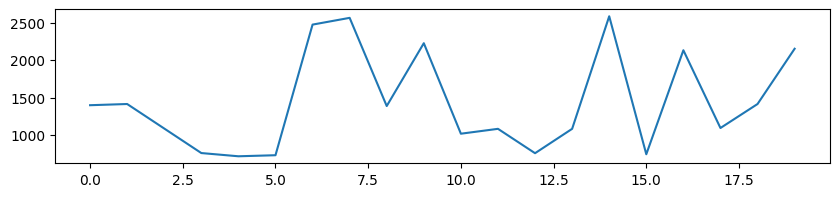

In [75]:
flights.dropna()['distance'].head(20).plot(figsize=(10,2))

<Axes: >

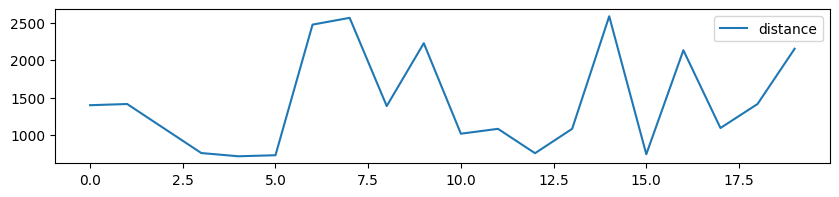

In [66]:
flights.dropna().head(20).plot(y="distance", figsize=(10,2))

<Axes: >

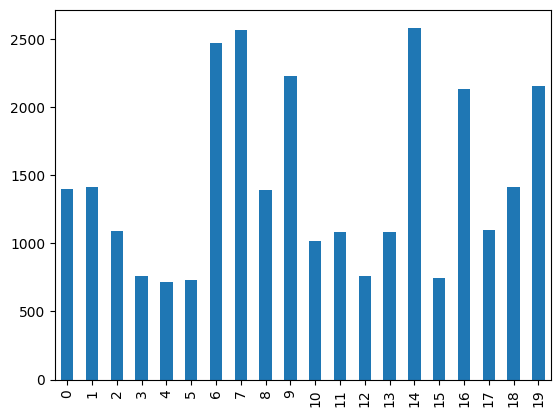

In [67]:
flights.dropna()['distance'].head(20).plot(kind='bar')

There are pseudo-sub-functions for each of the plot `kind`s
But in my opinion it's better to pass it as parameter.

<Axes: >

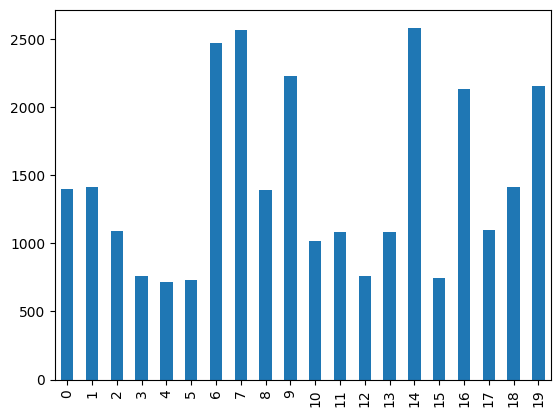

In [68]:
flights.dropna()['distance'].head(20).plot.bar()

<Axes: title={'center': 'This is a plot of distance'}>

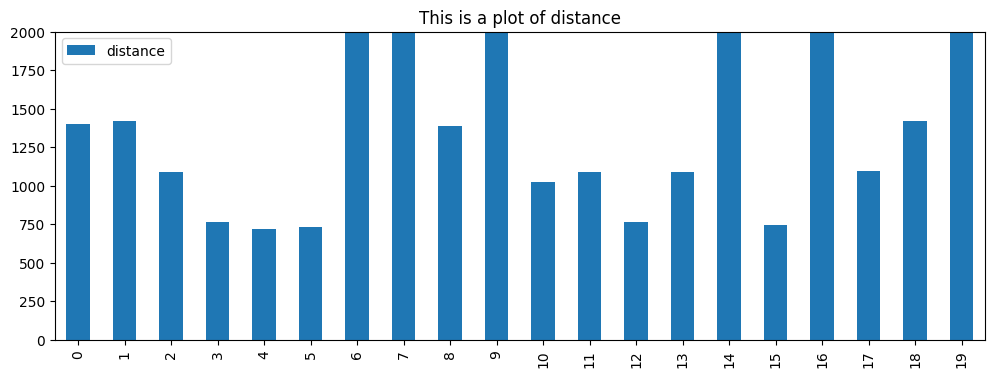

In [69]:
flights.dropna()['distance'].head(20).plot(
        kind='bar',
        legend=True,
        figsize=(12,4),
        ylim=(0,2000),
        title="This is a plot of distance")